In [ ]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers, optimizers

In [ ]:
# this is a data set with 25000 movies review labeled by setiment (positive or negative)
# each one of the elements of the data is a description

In [ ]:
(train_data, train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

In [ ]:
print(train_data.shape)
print(train_data[0])
print(train_labels[0])

(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


Diccionario de palabras

In [ ]:
word_index=imdb.get_word_index() # esto asocia la palabra con cada numero

In [ ]:
word_index

In [ ]:
#ahora para colocar los indices al lado derecho y los titulos de las peliculas al lado derecho
word_index=dict([(value,key) for (key,value) in word_index.items()])

In [ ]:
word_index

In [ ]:
for i in train_data[0]:
  print(word_index.get(i -3)) # se pone  -3 por que las tes primeras palabras son reservadas

In [ ]:
## numpy y keras solo pueden recbir tensores en la red neuronal teinen que tener dimensiones no pueden ser listas
## asi que se deben vectorizar las palabras
## vectorizar es convertir  un cuerpo de textos a numeros para ser procesado por modelos de ml

In [ ]:
def vectorizar(sequences,dim=10000):                 ## esto generara arreglos donde llenara de 1 cada posicion que 
  results = np.zeros((len(sequences),dim))           ## encuentre un simil de la entrada sequences 
  for i ,sequences in enumerate(sequences):
    results[i,sequences]=1
  return results

Transformando Datos

In [ ]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
x_train.shape

(25000, 10000)

In [ ]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [ ]:
##Entrenamiento del modelo de clasificacion 20/28

In [ ]:
model = models.Sequential()                                                        
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',          ## este optimizador es una version mejorada de Gradient Descent
              loss='binary_crossentropy',   ## La funcion de perdida sera esta en lugar de mse
              metrics='acc')

In [ ]:
#se crea ahora la data de validacion
x_val=x_train[:10000]
partial_x_train=x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Entrenando el modelo

In [ ]:
## Esto podria hacerse sin necesidad de separar los datos con la siguiente linea:
## history = model.fit(x_train,y_train,epochs=4,batch_size=512,validation_split=0.3)
history= model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20
                  ,                        ##las epochs son el numero de veces que se jecutaran los algoritmos de forward y back propagation
                   batch_size=512,
                   validation_data=(x_val,y_val))

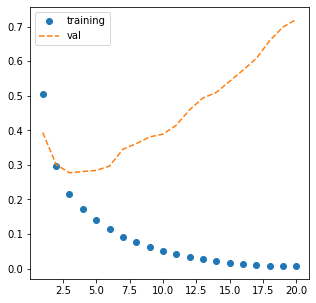

In [ ]:
import matplotlib.pyplot as plt 

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']  
fig = plt.figure(figsize=(5,5))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='val') 
plt.legend()
plt.show()

si la tasa de perdida con la data de entrenamiento converge muy bien, 
pero por otro lado la tasa de validacion no  , se puede presumir un overfitting

In [ ]:
###

Tecnicas para solucionar el over fitting 
"regularizacion-Dropout" 21/28

Regularizacion:hacer los datos mas regulares , se reducen los pesos o numeros qeu agrega la red , los pesos se sumaran a la funcion de costo  como valor absoluto o como cuadrado:

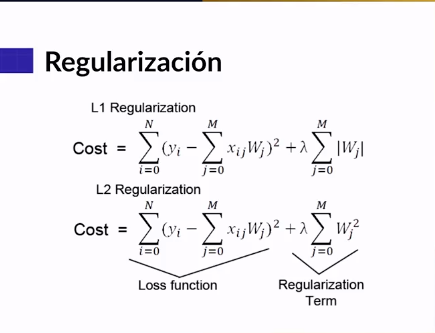

Dropout: esta tenica para evitar overfitting donde la idea es apagar algunas neuronas para que en cada iteracion se apague un porcentaje aleatorio de la red:


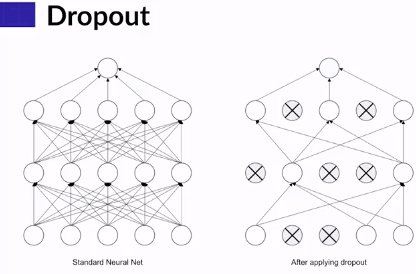

Reduciendo el over fitting  22/28

In [ ]:
## se cambiaron de 4 a 20 epochs
##Modelo menos complejo , tendra el mismo numero de acpas pero solo 4 neuronas 
model2 = models.Sequential()                                                        
model2.add(layers.Dense(4,activation='relu',input_shape=(10000,)))
model2.add(layers.Dense(4,activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))

model2.compile(optimizer='rmsprop',          
              loss='binary_crossentropy',   
              metrics='acc')



In [ ]:
history2= model2.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,                        ##las epochs son el numero de veces que se jecutaran los algoritmos de forward y back propagation
                   batch_size=512,
                   validation_data=(x_val,y_val))

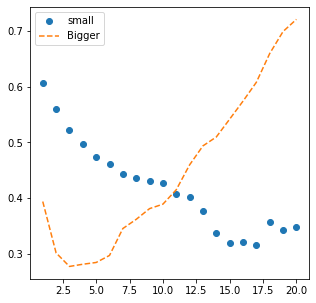

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values_2 = history_dict['val_loss']
val_loss_values_2 = history2.history['val_loss']  
fig = plt.figure(figsize=(5,5))


epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values_2, 'o',label='small')
plt.plot(epoch,val_loss_values, '--',label='Bigger') 
plt.legend()
plt.show()

podemos ver que un modelo mas pequeo es capaz de generalizar mejor 

Regularizacion

In [ ]:
## para regularazar se debe importar
from keras import regularizers

In [ ]:
model3 = models.Sequential()                                                        
model3.add(layers.Dense(16,activation='relu',input_shape=(10000,),
                        kernel_regularizer= regularizers.l2(0.001)))
model3.add(layers.Dense(16,  activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(1,activation='sigmoid'))

model3.compile(optimizer='rmsprop',          
              loss='binary_crossentropy',   
              metrics='acc')

In [ ]:
history3= model3.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,                        ##las epochs son el numero de veces que se jecutaran los algoritmos de forward y back propagation
                   batch_size=512,
                   validation_data=(x_val,y_val))

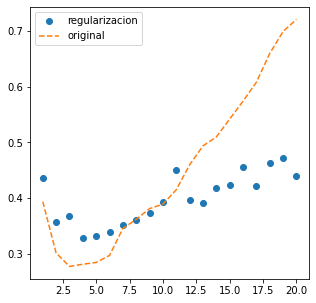

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values_ = history_dict['val_loss']
val_loss_values_3= history3.history['val_loss']  
fig = plt.figure(figsize=(5,5))


epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values_3, 'o',label='regularizacion')
plt.plot(epoch,val_loss_values, '--',label='original') 
plt.legend()
plt.show()

Probando el drop out

In [ ]:
model4 = models.Sequential()                                                        
model4.add(layers.Dense(4,activation='relu',input_shape=(10000,)))
model4.add(layers.Dropout(0.5))    #esta es la capa que se utiliza para apagar la mitad de las neuronas en cada entrenamiento
model4.add(layers.Dense(4,activation='relu'))
model4.add(layers.Dropout(0.5))    #esta capa hace lo mismo
model4.add(layers.Dense(1,activation='sigmoid'))

model4.compile(optimizer='rmsprop',          
              loss='binary_crossentropy',   
              metrics='acc')


In [ ]:
history4= model4.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,                        ##las epochs son el numero de veces que se jecutaran los algoritmos de forward y back propagation
                   batch_size=512,
                   validation_data=(x_val,y_val))

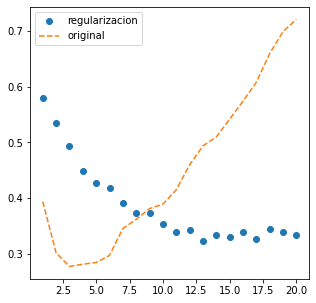

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values_ = history_dict['val_loss']
val_loss_values_4= history4.history['val_loss']  
fig = plt.figure(figsize=(5,5))


epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values_4, 'o',label='regularizacion')
plt.plot(epoch,val_loss_values, '--',label='original') 
plt.legend()
plt.show()